In [1]:
%cd ../..

/home/d/PycharmProjects/protein_properties


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
lstm_reg_results = pd.read_csv("log/SASALSTM_1_test_preds.tsv", sep="\t")
baseline_reg_results = pd.read_csv("log/SASABaseline_1_test_preds.tsv", sep="\t")
lstm_10_results = pd.read_csv("/home/d/PycharmProjects/protein_properties/log/SASALSTM_10_test_preds.tsv", sep="\t")
true_rsa = lstm_reg_results["Real_value"]

In [4]:
lstm_reg_results

,Pred_value,Real_value
0,0.5960,0.88000
1,0.2910,0.23970
2,0.3674,0.45460
3,0.1383,0.04960
4,0.3608,0.30570
...,...,...
75348,0.3213,0.10040
75349,0.3237,0.02042
75350,0.3413,0.12244
75351,0.4570,0.35350


In [5]:
test_np = np.load('data/sasa/test_X_c1.npy', allow_pickle=True)
shuffled_test = np.load("/home/d/PycharmProjects/protein_properties/data/sasa/test_y_c1.npy", allow_pickle=True)

In [6]:
true_reg = np.concatenate(shuffled_test)
true_reg = true_reg[np.where(true_reg != -1.0)]
true_reg.clip(0, 1, out=true_reg)

array([0.87967336, 0.239789  , 0.45450586, ..., 0.12244587, 0.35357952,
       0.36427596], dtype=float32)

In [7]:
true_reg.max()

1.0

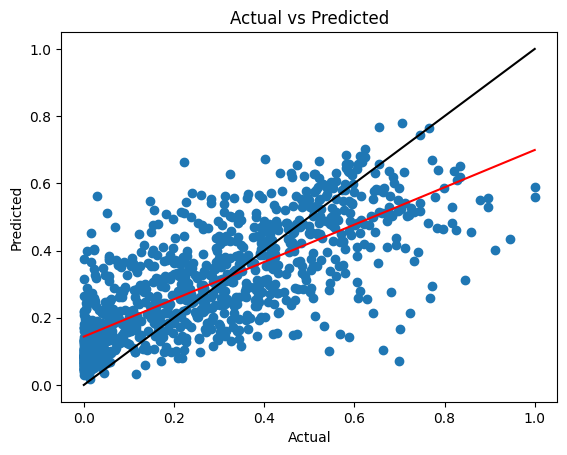

In [10]:
# scatter plot real vs predicted
plt.scatter(true_reg[:1000], baseline_reg_results["Pred_value"][0:1000])
# plot a line, a perfect prediction would be a straight line
plt.plot(np.unique(true_reg[:1000]), np.poly1d(np.polyfit(true_reg[:1000], np.array(baseline_reg_results["Pred_value"])[:1000], 1))(np.unique(true_reg[:1000])), color='red')
# plot a diagonal line
plt.plot([0, 1], [0, 1], 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [12]:
# generate mask that samples randomly samples from the true_rsa
mask = np.random.choice([False, True], size=true_rsa.shape, p=[0.95, 0.05])
mask

array([False, False, False, ..., False, False, False])

In [13]:
len(np.array(lstm_reg_results["Pred_value"])[mask])

3773

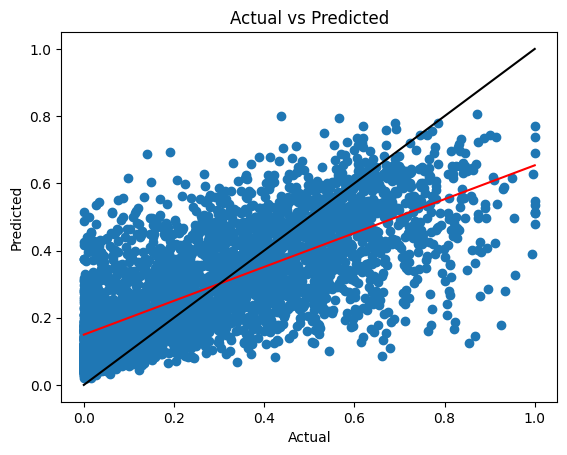

In [14]:
# scatter plot real vs predicted
# add diagonal line
plt.scatter(true_reg[mask], np.array(baseline_reg_results["Pred_value"])[mask])
# plot fit line
plt.plot(np.unique(true_reg[mask]), np.poly1d(np.polyfit(true_reg[mask], np.array(baseline_reg_results["Pred_value"])[mask], 1))(np.unique(true_reg[mask])), color='red')
plt.plot([0, 1], [0, 1], 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

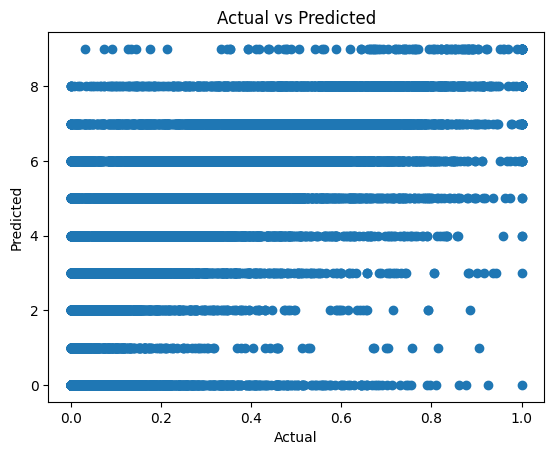

In [92]:
plt.scatter(true_reg[mask], lstm_10_results["Pred_class"][mask])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [10]:
stats.pearsonr(lstm_10_results["Pred_class"],true_reg)

PearsonRResult(statistic=0.7007416718615826, pvalue=0.0)

In [9]:
stats.pearsonr(lstm_reg_results["Pred_value"], true_reg)

PearsonRResult(statistic=0.7512776415829893, pvalue=0.0)

In [8]:
stats.spearmanr(lstm_reg_results["Pred_value"], true_reg)

SpearmanrResult(correlation=0.7717283881866982, pvalue=0.0)

In [12]:
from torch.nn import functional as F
import torch
pred = torch.tensor(lstm_reg_results["Pred_value"])
F.l1_loss(pred, torch.tensor(true_reg))

tensor(0.1168, dtype=torch.float64)

In [14]:
from torchmetrics.functional.classification import binary_f1_score, multiclass_f1_score, binary_accuracy, multiclass_accuracy, matthews_corrcoef
multiclass_f1_score(torch.tensor(lstm_10_results["Pred_class"]), torch.tensor(lstm_10_results["Real_class"]), num_classes=10, average="macro")

tensor(0.2858)